# Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [45]:
def null_and_unique_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Completes information about the dataframe columns, including unique values and null values.
    """

    df_list = []
    for col in df.columns:
        info_df = pd.DataFrame(
            {col: [
                df[col].nunique(), df[col].isnull().sum()]}, index=['unique_values', 'null_values'])
        df_list.append(info_df)

    return pd.concat(df_list, axis=1)

# Data ingestion

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

random_feature = 'random_feature1'
random_feature2 = 'random_feature2'

# random features that may help to understand the data, due to not being correlated with the target
mu = 20
sigma = 5
train[random_feature] = np.random.rand(train.shape[0])
train[random_feature2] = sigma * np.random.randn(train.shape[0]) + mu
train

,fake_cnpj,date_reference,general_lost_pct_risco,years_since_first_relationship,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,days_since_oldest_board_member,v001r_social_capital,cnt_declined_reasons,chk_esp_cred_rot_a_vencer_pct_risco,general_limite_de_cred_sum_pct_risco,...,general_prejuizo_sum_pct_risco,general_lost_pct_cart_cred,general_a_vencer_under180d,general_a_vencer_over180d,general_vencido_max_prev_6mo,general_vencido_pct_risco_max_prev_6mo,general_vencido_pct_carteira_cred__max_prev_6mo,TARGET_default_within_11m,random_feature1,random_feature2
0,76,2021-07-01,0.0,24.723288,0.064502,-1.000000,0.00,0,0.000000e+00,0.979557,...,0.0,0.0,1164.08,0.00,0.0,0.0,0.0,0,0.825483,16.769842
1,76,2021-06-01,0.0,24.641096,0.064502,-1.000000,0.00,0,0.000000e+00,0.935028,...,0.0,0.0,3875.98,0.00,0.0,0.0,0.0,0,0.940509,13.993797
2,76,2021-04-01,0.0,24.473973,0.025317,-1.000000,0.00,0,2.531734e-02,0.955332,...,0.0,0.0,1913.06,0.00,0.0,0.0,0.0,0,0.076247,17.052690
3,76,2021-08-01,0.0,24.808219,0.068648,-1.000000,0.00,0,6.864840e-02,0.931352,...,0.0,0.0,3831.74,0.00,0.0,0.0,0.0,0,0.856971,29.285155
4,76,2021-05-01,0.0,24.556164,0.064502,-1.000000,0.00,0,6.450210e-02,0.855601,...,0.0,0.0,6594.61,0.00,0.0,0.0,0.0,0,0.637827,18.494504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87743,18718,2021-06-01,0.0,7.038356,0.002957,7.071233,5084484.98,0,2.626680e-03,0.320056,...,0.0,0.0,1146621.98,138045.87,0.0,0.0,0.0,0,0.482405,30.720527
87744,18718,2021-03-01,0.0,6.786301,0.002957,6.819178,5084484.98,0,7.855551e-05,0.373114,...,0.0,0.0,1004436.25,112866.58,0.0,0.0,0.0,0,0.309348,16.614953
87745,18718,2021-01-01,0.0,6.624658,0.002957,6.657534,5084484.98,0,4.661295e-07,0.379245,...,0.0,0.0,865327.44,146781.27,0.0,0.0,0.0,0,0.055152,18.346182
87746,18718,2021-02-01,0.0,6.709589,0.002957,6.742466,5084484.98,0,2.724807e-03,0.535538,...,0.0,0.0,613041.32,140339.17,0.0,0.0,0.0,0,0.731671,18.186365


## Fast check on data type and values

In [47]:
train.dtypes

fake_cnpj                                             int64
date_reference                                       object
general_lost_pct_risco                              float64
years_since_first_relationship                      float64
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo    float64
days_since_oldest_board_member                      float64
v001r_social_capital                                float64
cnt_declined_reasons                                  int64
chk_esp_cred_rot_a_vencer_pct_risco                 float64
general_limite_de_cred_sum_pct_risco                float64
general_limite_de_cred_sum                          float64
general_a_vencer_weighted_periodo_div_pct_risco     float64
avg_final_numeric_prediction_prev_6mo               float64
is_not_able_to_calc_interest                          int64
min_lt_ir3_prev_6mo                                 float64
general_limite_de_cred_360m_sum                     float64
v204r_is_popular_domain                 

In [48]:
# Summary of column values
summary = pd.concat([train.describe(), null_and_unique_info(train)], axis=0)
summary

,fake_cnpj,general_lost_pct_risco,years_since_first_relationship,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,days_since_oldest_board_member,v001r_social_capital,cnt_declined_reasons,chk_esp_cred_rot_a_vencer_pct_risco,general_limite_de_cred_sum_pct_risco,general_limite_de_cred_sum,...,general_lost_pct_cart_cred,general_a_vencer_under180d,general_a_vencer_over180d,general_vencido_max_prev_6mo,general_vencido_pct_risco_max_prev_6mo,general_vencido_pct_carteira_cred__max_prev_6mo,TARGET_default_within_11m,random_feature1,random_feature2,date_reference
count,87748.000000,87748.000000,87748.000000,87748.000000,87748.000000,8.774800e+04,87748.000000,87748.000000,87748.000000,8.774800e+04,...,87748.000000,8.774800e+04,8.774800e+04,8.774800e+04,87748.000000,87748.000000,87748.000000,87748.000000,87748.000000,NaN
mean,27516.211412,0.003040,8.107081,0.079796,6.741786,1.236948e+07,0.136926,0.032842,0.298488,4.169266e+05,...,0.003552,4.404431e+06,2.299126e+06,2.858535e+04,0.023796,0.030985,0.128607,0.499711,20.004952,NaN
std,24636.208818,0.012556,8.530493,0.176571,7.834133,4.302228e+08,0.357806,0.115423,0.306636,4.320431e+06,...,0.017125,1.189024e+08,3.008036e+07,3.911617e+05,0.102159,0.124191,0.334766,0.288144,5.013389,NaN
min,27.000000,0.000000,-0.079452,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,-2.164130,NaN
25%,10074.000000,0.000000,2.383562,0.000000,1.594521,2.000000e+04,0.000000,0.000000,0.045056,6.621715e+03,...,0.000000,1.472424e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.250736,16.621100,NaN
50%,22283.000000,0.000000,5.002740,0.005537,4.268493,9.370000e+04,0.000000,0.000000,0.180504,3.673979e+04,...,0.000000,5.950890e+04,4.431966e+04,0.000000e+00,0.000000,0.000000,0.000000,0.500185,20.009054,NaN
75%,36541.750000,0.000000,10.969863,0.066584,9.487671,2.000000e+05,0.000000,0.008202,0.486937,1.570261e+05,...,0.000000,2.837836e+05,2.479043e+05,5.177000e+01,0.000055,0.000074,0.000000,0.749261,23.389741,NaN
max,116351.000000,0.099917,58.723288,1.000000,58.315068,2.363110e+10,2.000000,1.000000,0.999965,5.588204e+08,...,0.979432,1.055517e+10,2.870458e+09,2.128458e+07,1.000000,1.000000,1.000000,0.999987,39.690727,NaN
unique_values,5258.000000,9585.000000,11663.000000,18314.000000,11008.000000,9.660000e+02,3.000000,41005.000000,80301.000000,7.046000e+04,...,9588.000000,8.685100e+04,6.183300e+04,6.879000e+03,7036.000000,6978.000000,2.000000,87748.000000,87748.000000,35.0
null_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# EDA

In [49]:
keys = ['fake_cnpj', 'date_reference']
target = 'TARGET_default_within_11m'

In [50]:
# unique dtypes
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [51]:
# object columns
train.select_dtypes(include='object').columns

Index(['date_reference'], dtype='object')

In [52]:
decimal_features = list(set(train.select_dtypes(include='float')) - set(keys + [target]))
decimal_features

['general_lost_pct_cart_cred',
 'general_vencido_max_prev_6mo',
 'days_since_oldest_board_member',
 'general_limite_de_cred_sum_pct_risco',
 'risco_total',
 'general_prejuizo_sum',
 'years_since_first_relationship',
 'general_cred_de_liberar_sum',
 'general_a_vencer_pct_risco',
 'credit_a_vencer_sum',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'random_feature2',
 'v001r_social_capital',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'chk_esp_cred_rot_a_vencer_sum',
 'general_limite_de_cred_sum',
 'general_coobrigacoes_sum',
 'random_feature1',
 'general_vencido_sum',
 'carteira_cred_sum',
 'general_a_vencer_sum',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_a_vencer_over180d',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'general_lost_sum',
 'general_lost_pct_risco',
 'general_prejuizo_sum_pct_risco',
 'avg_final_numeric_prediction_prev_6mo',
 'primary_median_ir3_prev_6mo',
 'general_a_vencer_under180d',
 'general_a_vencer_under30d',
 'general_limite_de_cr

In [53]:
# Integer and boolean features
integer_features = list(set(train.select_dtypes(include='int')) - set(keys + [target]))
integer_features

['is_not_able_to_calc_interest',
 'cnt_declined_reasons',
 'v254r_cnt_board_memebers',
 'v204r_is_popular_domain']

## Target

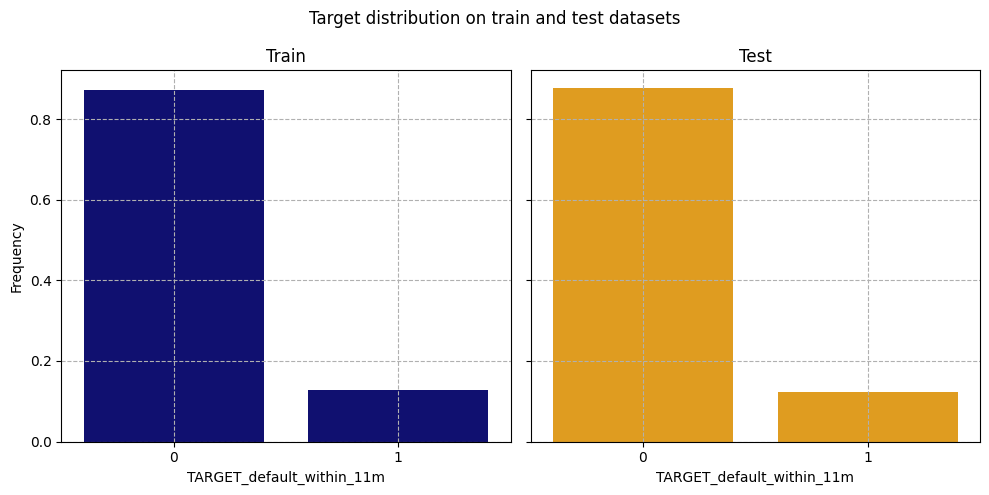

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, tight_layout=True)
sns.barplot(train[target].value_counts(1), ax=ax[0], label='train', color='navy', legend=False)
sns.barplot(test[target].value_counts(1), ax=ax[1], label='test', color='orange', legend=False)
fig.suptitle('Target distribution on train and test datasets')
ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_ylabel('Frequency')
ax[0].grid(linestyle='--')
ax[1].grid(linestyle='--')
plt.show()

## Features that are based on credit models

In [55]:
train[keys + ['avg_final_numeric_prediction_prev_6mo', 'general_prejuizo_sum']].head(7).sort_values(by='date_reference')

,fake_cnpj,date_reference,avg_final_numeric_prediction_prev_6mo,general_prejuizo_sum
5,76,2021-03-01,800000.0,0.0
2,76,2021-04-01,800000.0,0.0
4,76,2021-05-01,800000.0,0.0
1,76,2021-06-01,800000.0,0.0
0,76,2021-07-01,800000.0,0.0
3,76,2021-08-01,900000.0,0.0
6,76,2021-09-01,900000.0,0.0


In [56]:
# check if feature has 'limit' in its name
crf = list(set([col for col in train.columns if 'lim' in col] + [col for col in train.columns if 'ris' in col]))

set([c for c in train.columns if c not in crf])

{'TARGET_default_within_11m',
 'avg_final_numeric_prediction_prev_6mo',
 'carteira_cred_sum',
 'chk_esp_cred_rot_a_vencer_sum',
 'cnt_declined_reasons',
 'credit_a_vencer_sum',
 'date_reference',
 'days_since_oldest_board_member',
 'days_since_stopped_simples',
 'fake_cnpj',
 'general_a_vencer_over180d',
 'general_a_vencer_sum',
 'general_a_vencer_under180d',
 'general_a_vencer_under30d',
 'general_coobrigacoes_sum',
 'general_cred_de_liberar_sum',
 'general_lost_pct_cart_cred',
 'general_lost_sum',
 'general_prejuizo_sum',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_sum',
 'is_not_able_to_calc_interest',
 'min_lt_ir3_prev_6mo',
 'primary_median_ir3_prev_6mo',
 'random_feature1',
 'random_feature2',
 'special_inter_rate',
 'v001r_social_capital',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship'}

In [57]:
train[keys + ['chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo', 'chk_esp_cred_rot_a_vencer_pct_risco', 'risco_total']]

,fake_cnpj,date_reference,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,chk_esp_cred_rot_a_vencer_pct_risco,risco_total
0,76,2021-07-01,0.064502,0.000000e+00,56944.08
1,76,2021-06-01,0.064502,0.000000e+00,59655.98
2,76,2021-04-01,0.025317,2.531734e-02,42828.75
3,76,2021-08-01,0.068648,6.864840e-02,55816.89
4,76,2021-05-01,0.064502,6.450210e-02,45669.21
...,...,...,...,...,...
87743,18718,2021-06-01,0.002957,2.626680e-03,1889373.34
87744,18718,2021-03-01,0.002957,7.855551e-05,1782306.53
87745,18718,2021-01-01,0.002957,4.661295e-07,1630448.28
87746,18718,2021-02-01,0.002957,2.724807e-03,1622048.79


## Correlations

## Feature correlation with Target

In [58]:
# linear correlation (Pearson) between features and target
correlation_feature_target_dict = {}
for feature in decimal_features + integer_features:
    correlation_feature_target_dict[feature] = train[[target, feature]].corr('pearson')[target][feature]

correlation_feature_target_df = pd.DataFrame(correlation_feature_target_dict, index=['correlation']).T
correlation_feature_target_df['abs_correlation'] = correlation_feature_target_df['correlation'].abs()
correlation_feature_target_df.sort_values(by='abs_correlation', ascending=False)

,correlation,abs_correlation
general_lost_pct_risco,0.350580,0.350580
general_vencido_sum_sum_pct_risco,0.349564,0.349564
cnt_declined_reasons,0.303392,0.303392
general_lost_pct_cart_cred,0.277746,0.277746
general_vencido_pct_risco_max_prev_6mo,0.204962,0.204962
general_limite_de_cred_sum_pct_risco,-0.194269,0.194269
general_a_vencer_pct_risco,0.192708,0.192708
general_vencido_pct_carteira_cred__max_prev_6mo,0.176979,0.176979
days_since_oldest_board_member,-0.139252,0.139252
v254r_cnt_board_memebers,-0.134666,0.134666


In [59]:
# Apparently, the linear correlation between the features and the target is very low.
# This may be a problem for linear models.
# The use of non-linear models to solve this problem is an alternative.

In [60]:
# Repeating the process but looking for non-linear correlation using the Spearman correlation, as we don't know
# yet the distributions of the features. 
# The Spearman correlation is a non-parametric measure of rank correlation. It assesses how well the relationship
# between two variables can be described using a monotonic function.

nl_correlation_feature_target_dict = {}
for feature in decimal_features + integer_features:
    nl_correlation_feature_target_dict[feature] = train[[target, feature]].corr('spearman')[target][feature]

nl_correlation_feature_target_df = pd.DataFrame(nl_correlation_feature_target_dict, index=['correlation']).T
nl_correlation_feature_target_df['abs_correlation'] = nl_correlation_feature_target_df['correlation'].abs()
nl_correlation_feature_target_df.sort_values(by='abs_correlation', ascending=False)

,correlation,abs_correlation
general_vencido_sum_sum_pct_risco,0.334546,0.334546
general_lost_pct_risco,0.333729,0.333729
general_lost_pct_cart_cred,0.332776,0.332776
general_vencido_sum,0.328774,0.328774
general_lost_sum,0.327469,0.327469
cnt_declined_reasons,0.304303,0.304303
general_vencido_pct_risco_max_prev_6mo,0.287662,0.287662
general_vencido_pct_carteira_cred__max_prev_6mo,0.282094,0.282094
general_vencido_max_prev_6mo,0.271482,0.271482
general_limite_de_cred_sum,-0.227086,0.227086


### Filtering out the features with almost no correlation with the target feature

In [61]:
# assuming correlation >= 0.5 as a strong correlation, correlation >= 0.3 as a moderate correlation and
# correlation >= 0.1 as a weak correlation, we can select the features that have at least a weak correlation,
# as we may extract some information from them using a boosting model, for example.

features = list(
    nl_correlation_feature_target_df
    .query('abs_correlation >= 0.1')
    .sort_values(by='abs_correlation', ascending=False)
    .index
    )
features

['general_vencido_sum_sum_pct_risco',
 'general_lost_pct_risco',
 'general_lost_pct_cart_cred',
 'general_vencido_sum',
 'general_lost_sum',
 'cnt_declined_reasons',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_max_prev_6mo',
 'general_limite_de_cred_sum',
 'general_limite_de_cred_360m_sum',
 'general_limite_de_cred_sum_pct_risco',
 'v254r_cnt_board_memebers',
 'general_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'chk_esp_cred_rot_a_vencer_sum',
 'days_since_oldest_board_member',
 'years_since_first_relationship',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'v204r_is_popular_domain',
 'general_limite_trend_6mo',
 'is_not_able_to_calc_interest']

### Analyzing the correlation between the features to avoid multicollinearity

In [62]:
# check to identify columns with many zeros
train[features].apply(lambda x: (x == 0).mean()).sort_values(ascending=False)

general_vencido_sum_sum_pct_risco                   0.894049
general_vencido_sum                                 0.894049
general_lost_pct_cart_cred                          0.890459
general_lost_sum                                    0.890459
general_lost_pct_risco                              0.890459
cnt_declined_reasons                                0.867997
general_vencido_pct_risco_max_prev_6mo              0.734193
general_vencido_pct_carteira_cred__max_prev_6mo     0.734193
general_vencido_max_prev_6mo                        0.734193
v204r_is_popular_domain                             0.649337
chk_esp_cred_rot_a_vencer_pct_risco                 0.528411
chk_esp_cred_rot_a_vencer_sum                       0.528411
is_not_able_to_calc_interest                        0.284303
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo    0.273750
general_limite_de_cred_360m_sum                     0.145724
general_limite_trend_6mo                            0.111421
general_limite_de_cred_s

In [63]:
# checking if high correlation means lack of information
(train[['general_vencido_sum_sum_pct_risco', 'general_vencido_sum', 'general_lost_pct_cart_cred', 'general_lost_sum', 'general_lost_pct_risco']]
    .query('general_vencido_sum_sum_pct_risco == 0 and general_vencido_sum == 0 and general_lost_pct_cart_cred == 0 and general_lost_sum == 0 and general_lost_pct_risco == 0')).shape[0], train.shape[0]

(78136, 87748)

In [64]:
# checking if high correlation means lack of information
general_features = [c for c in train.columns if 'general' in c]
general_features_equals_zero_query__and = 'general_vencido_sum_sum_pct_risco == 0 and general_vencido_sum == 0 and general_lost_pct_cart_cred == 0 and general_lost_sum == 0 and general_lost_pct_risco == 0'
general_features_diff_zero_query__or = 'general_vencido_sum_sum_pct_risco != 0 or general_vencido_sum != 0 or general_lost_pct_cart_cred != 0 or general_lost_sum != 0 or general_lost_pct_risco != 0'
train[general_features].query(general_features_equals_zero_query__and).shape[0], train.shape[0]

(78136, 87748)

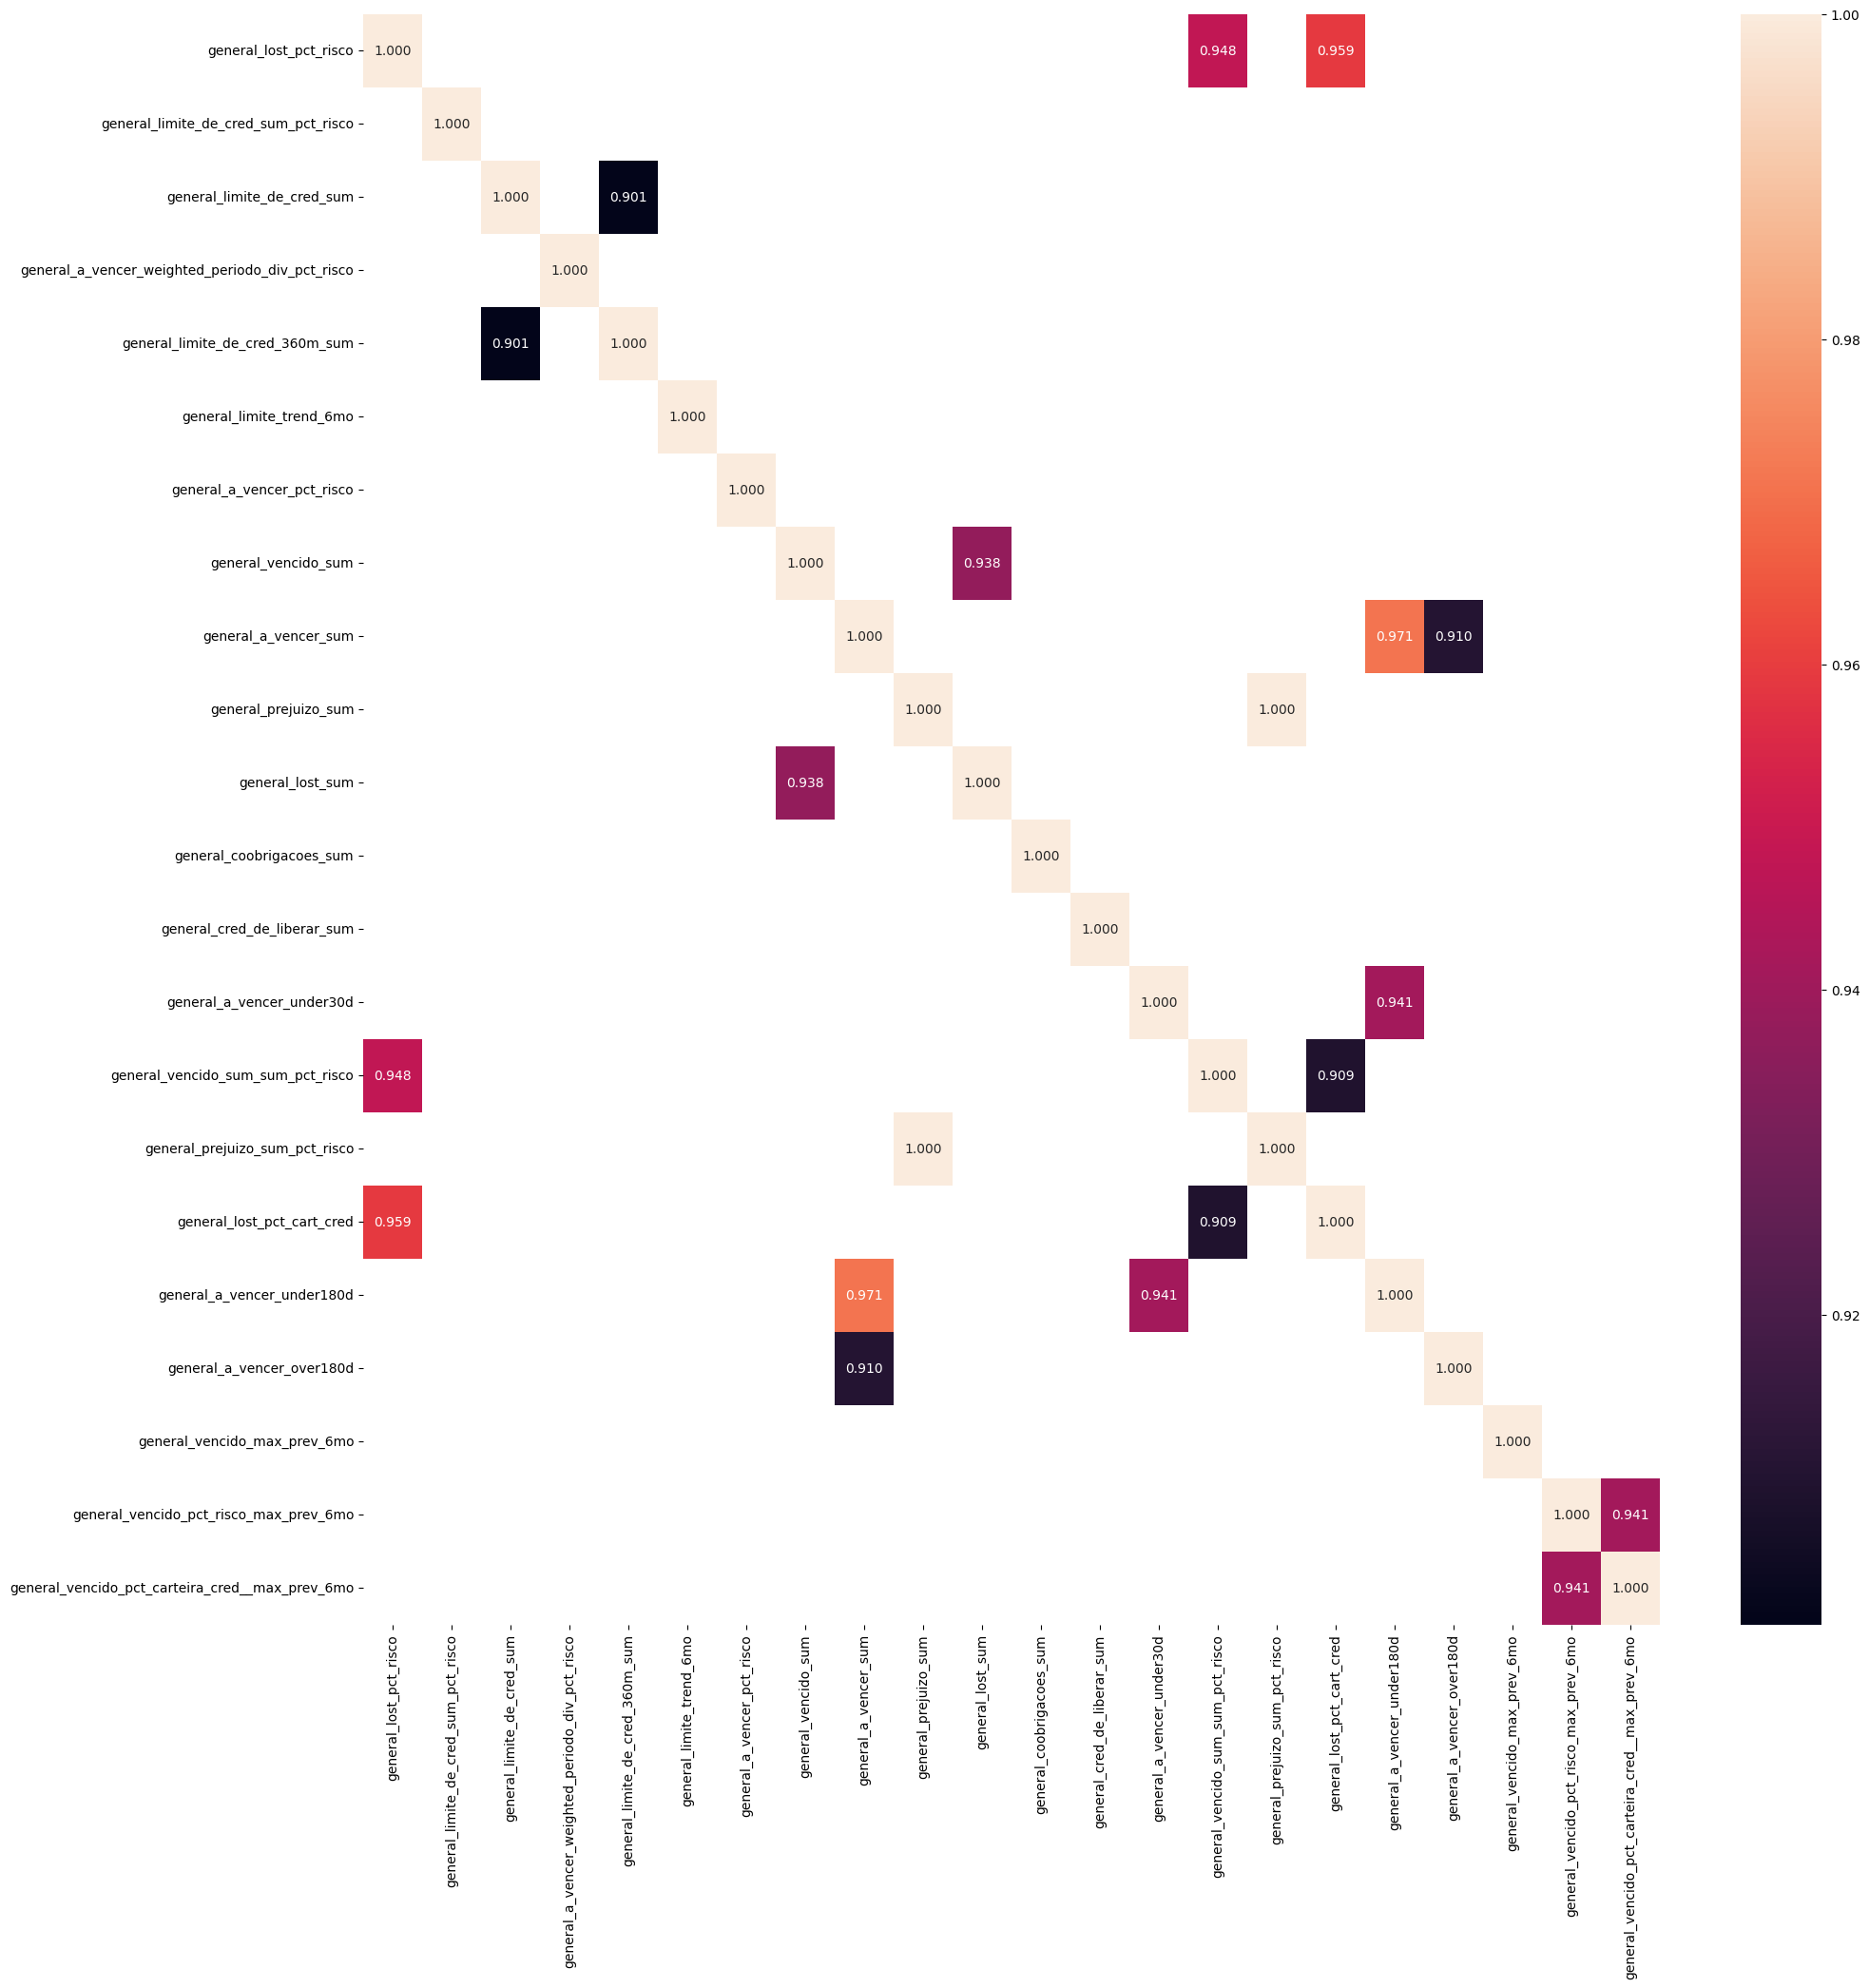

In [65]:
detailed_correlations1 = (
    train[general_features]
    .query(general_features_diff_zero_query__or)
    ).corr('spearman')

plt.figure(figsize=(len(general_features), len(general_features)))
sns.heatmap(detailed_correlations1, annot=True, fmt='.3f', mask=detailed_correlations1 < 0.9)
plt.show()

In [66]:
# pairs of features in detailed_correlations1 that have a correlation greater than 0.9
general_feature_pairs_with_high_correlation = []
for i in range(detailed_correlations1.shape[0]):
    for j in range(i):
        if detailed_correlations1.iloc[i, j] > 0.9:
            general_feature_pairs_with_high_correlation.append((detailed_correlations1.index[i], detailed_correlations1.columns[j]))

general_feature_pairs_with_high_correlation

[('general_limite_de_cred_360m_sum', 'general_limite_de_cred_sum'),
 ('general_lost_sum', 'general_vencido_sum'),
 ('general_vencido_sum_sum_pct_risco', 'general_lost_pct_risco'),
 ('general_prejuizo_sum_pct_risco', 'general_prejuizo_sum'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_a_vencer_under180d', 'general_a_vencer_sum'),
 ('general_a_vencer_under180d', 'general_a_vencer_under30d'),
 ('general_a_vencer_over180d', 'general_a_vencer_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo')]

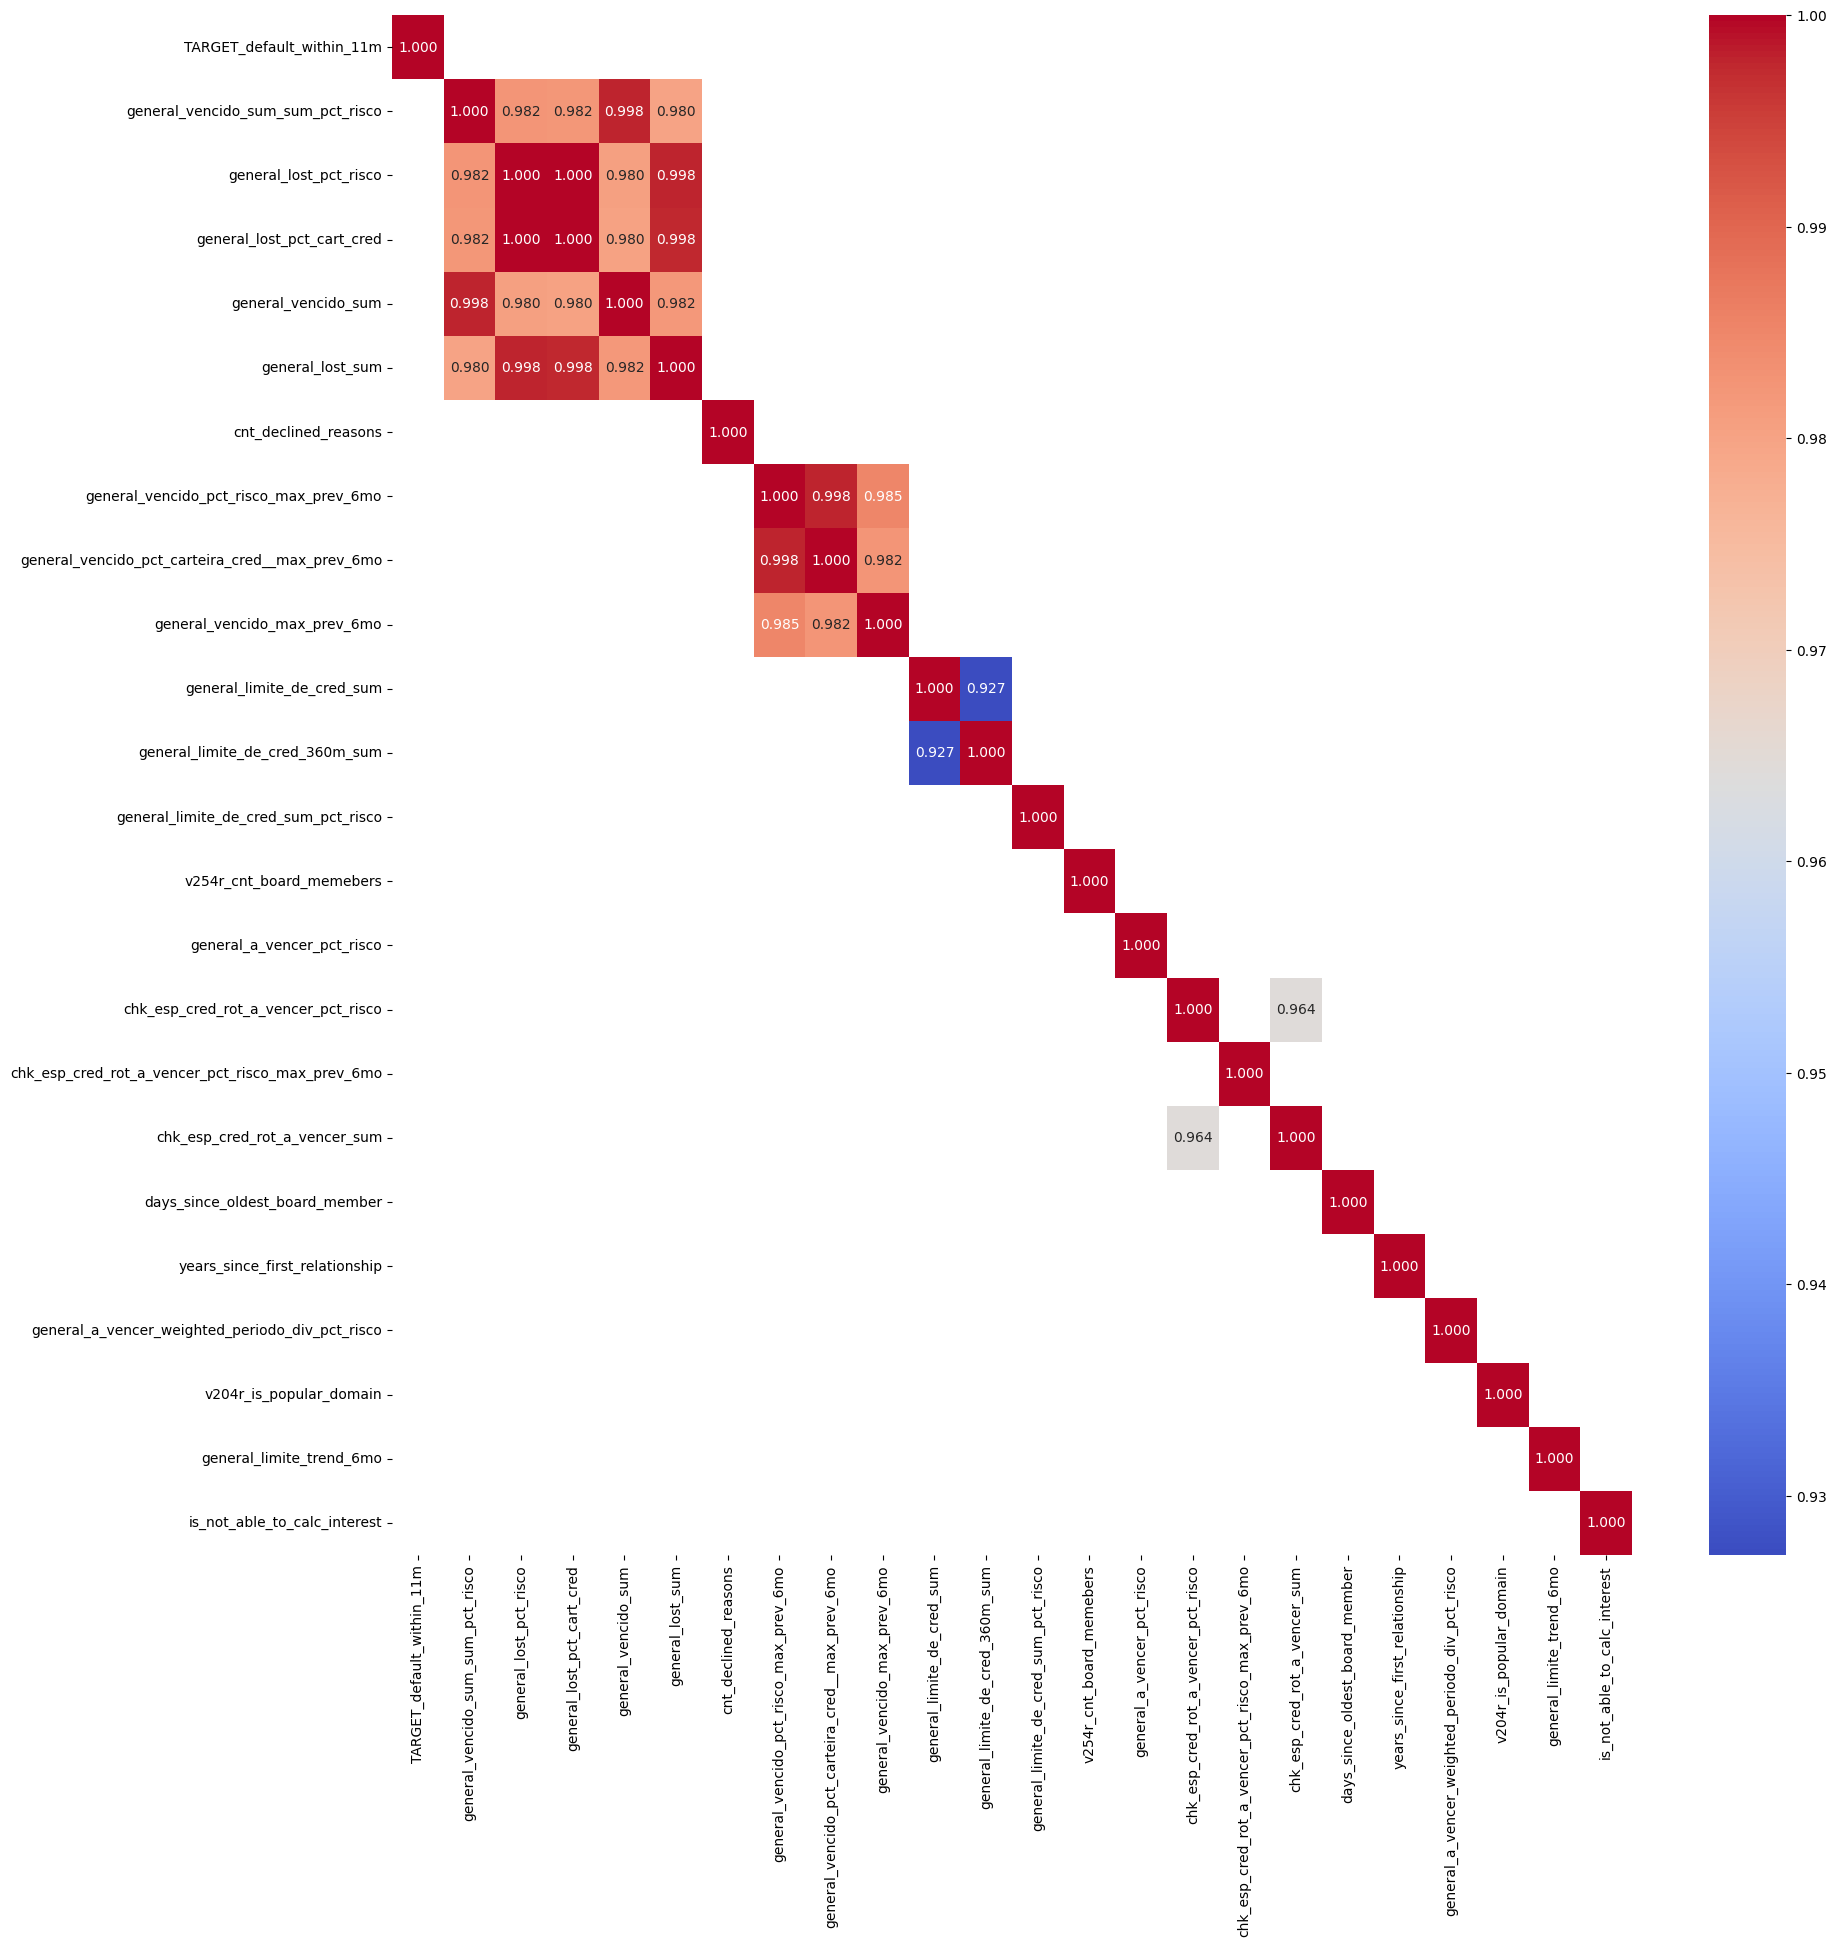

In [67]:
# Plotting the Pearson's correlation matrix
correlations = train[[target] + features].corr('spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', mask=correlations < 0.9)
plt.show()

In [68]:
correlations_features_with_high_correlation = []
for i in range(correlations.shape[0]):
    for j in range(i):
        if correlations.iloc[i, j] > 0.9:
            correlations_features_with_high_correlation.append((correlations.index[i], correlations.columns[j]))

correlations_features_with_high_correlation

[('general_lost_pct_risco', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_vencido_sum', 'general_vencido_sum_sum_pct_risco'),
 ('general_vencido_sum', 'general_lost_pct_risco'),
 ('general_vencido_sum', 'general_lost_pct_cart_cred'),
 ('general_lost_sum', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_sum', 'general_lost_pct_risco'),
 ('general_lost_sum', 'general_lost_pct_cart_cred'),
 ('general_lost_sum', 'general_vencido_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_max_prev_6mo', 'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_max_prev_6mo',
  'general_vencido_pct_carteira_cred__max_prev_6mo'),
 ('general_limite_de_cred_360m_sum', 'general_limite_de_cred_sum'),
 ('chk_esp_cred_rot_a_vencer_sum', 'chk_esp_cred_rot_a_vencer_pct_risco')]

In [69]:
# pairs present in both correlations_features_with_high_correlation and general_feature_pairs_with_high_correlation
general_features_to_remove = set(correlations_features_with_high_correlation) & set(general_feature_pairs_with_high_correlation)
general_features_to_remove
# we may remove these features as even considering values other than zero they are highly correlated

{('general_limite_de_cred_360m_sum', 'general_limite_de_cred_sum'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_sum', 'general_vencido_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo')}

In [70]:
features_to_remove = []
for feature_idx, feature1 in enumerate(features):
    for feature2 in features[feature_idx + 1:]:
        if abs(correlations[feature1][feature2]) > 0.9:
            if 'general' in feature1 and 'general' in feature2 and set([feature1, feature2]) in general_features_to_remove:        
                print(f'{feature1} and {feature2} have a correlation greater than 0.9')
                print(f'removing {feature2} from the list of features')
                features_to_remove.append(feature2)
            elif 'general' not in feature1 or 'general' not in feature2:
                print(f'{feature1} and {feature2} have a correlation greater than 0.9')
                print(f'removing {feature2} from the list of features')
                features_to_remove.append(feature2)

chk_esp_cred_rot_a_vencer_pct_risco and chk_esp_cred_rot_a_vencer_sum have a correlation greater than 0.9
removing chk_esp_cred_rot_a_vencer_sum from the list of features


In [71]:
features_to_keep = list(set(features) - set(features_to_remove))
features_to_keep

['general_lost_pct_cart_cred',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'general_vencido_max_prev_6mo',
 'general_limite_de_cred_sum_pct_risco',
 'days_since_oldest_board_member',
 'general_lost_sum',
 'cnt_declined_reasons',
 'general_lost_pct_risco',
 'years_since_first_relationship',
 'general_a_vencer_pct_risco',
 'v254r_cnt_board_memebers',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_limite_de_cred_360m_sum',
 'v204r_is_popular_domain',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_limite_trend_6mo',
 'general_limite_de_cred_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'is_not_able_to_calc_interest',
 'general_vencido_sum',
 'general_vencido_sum_sum_pct_risco',
 'general_a_vencer_weighted_periodo_div_pct_risco']

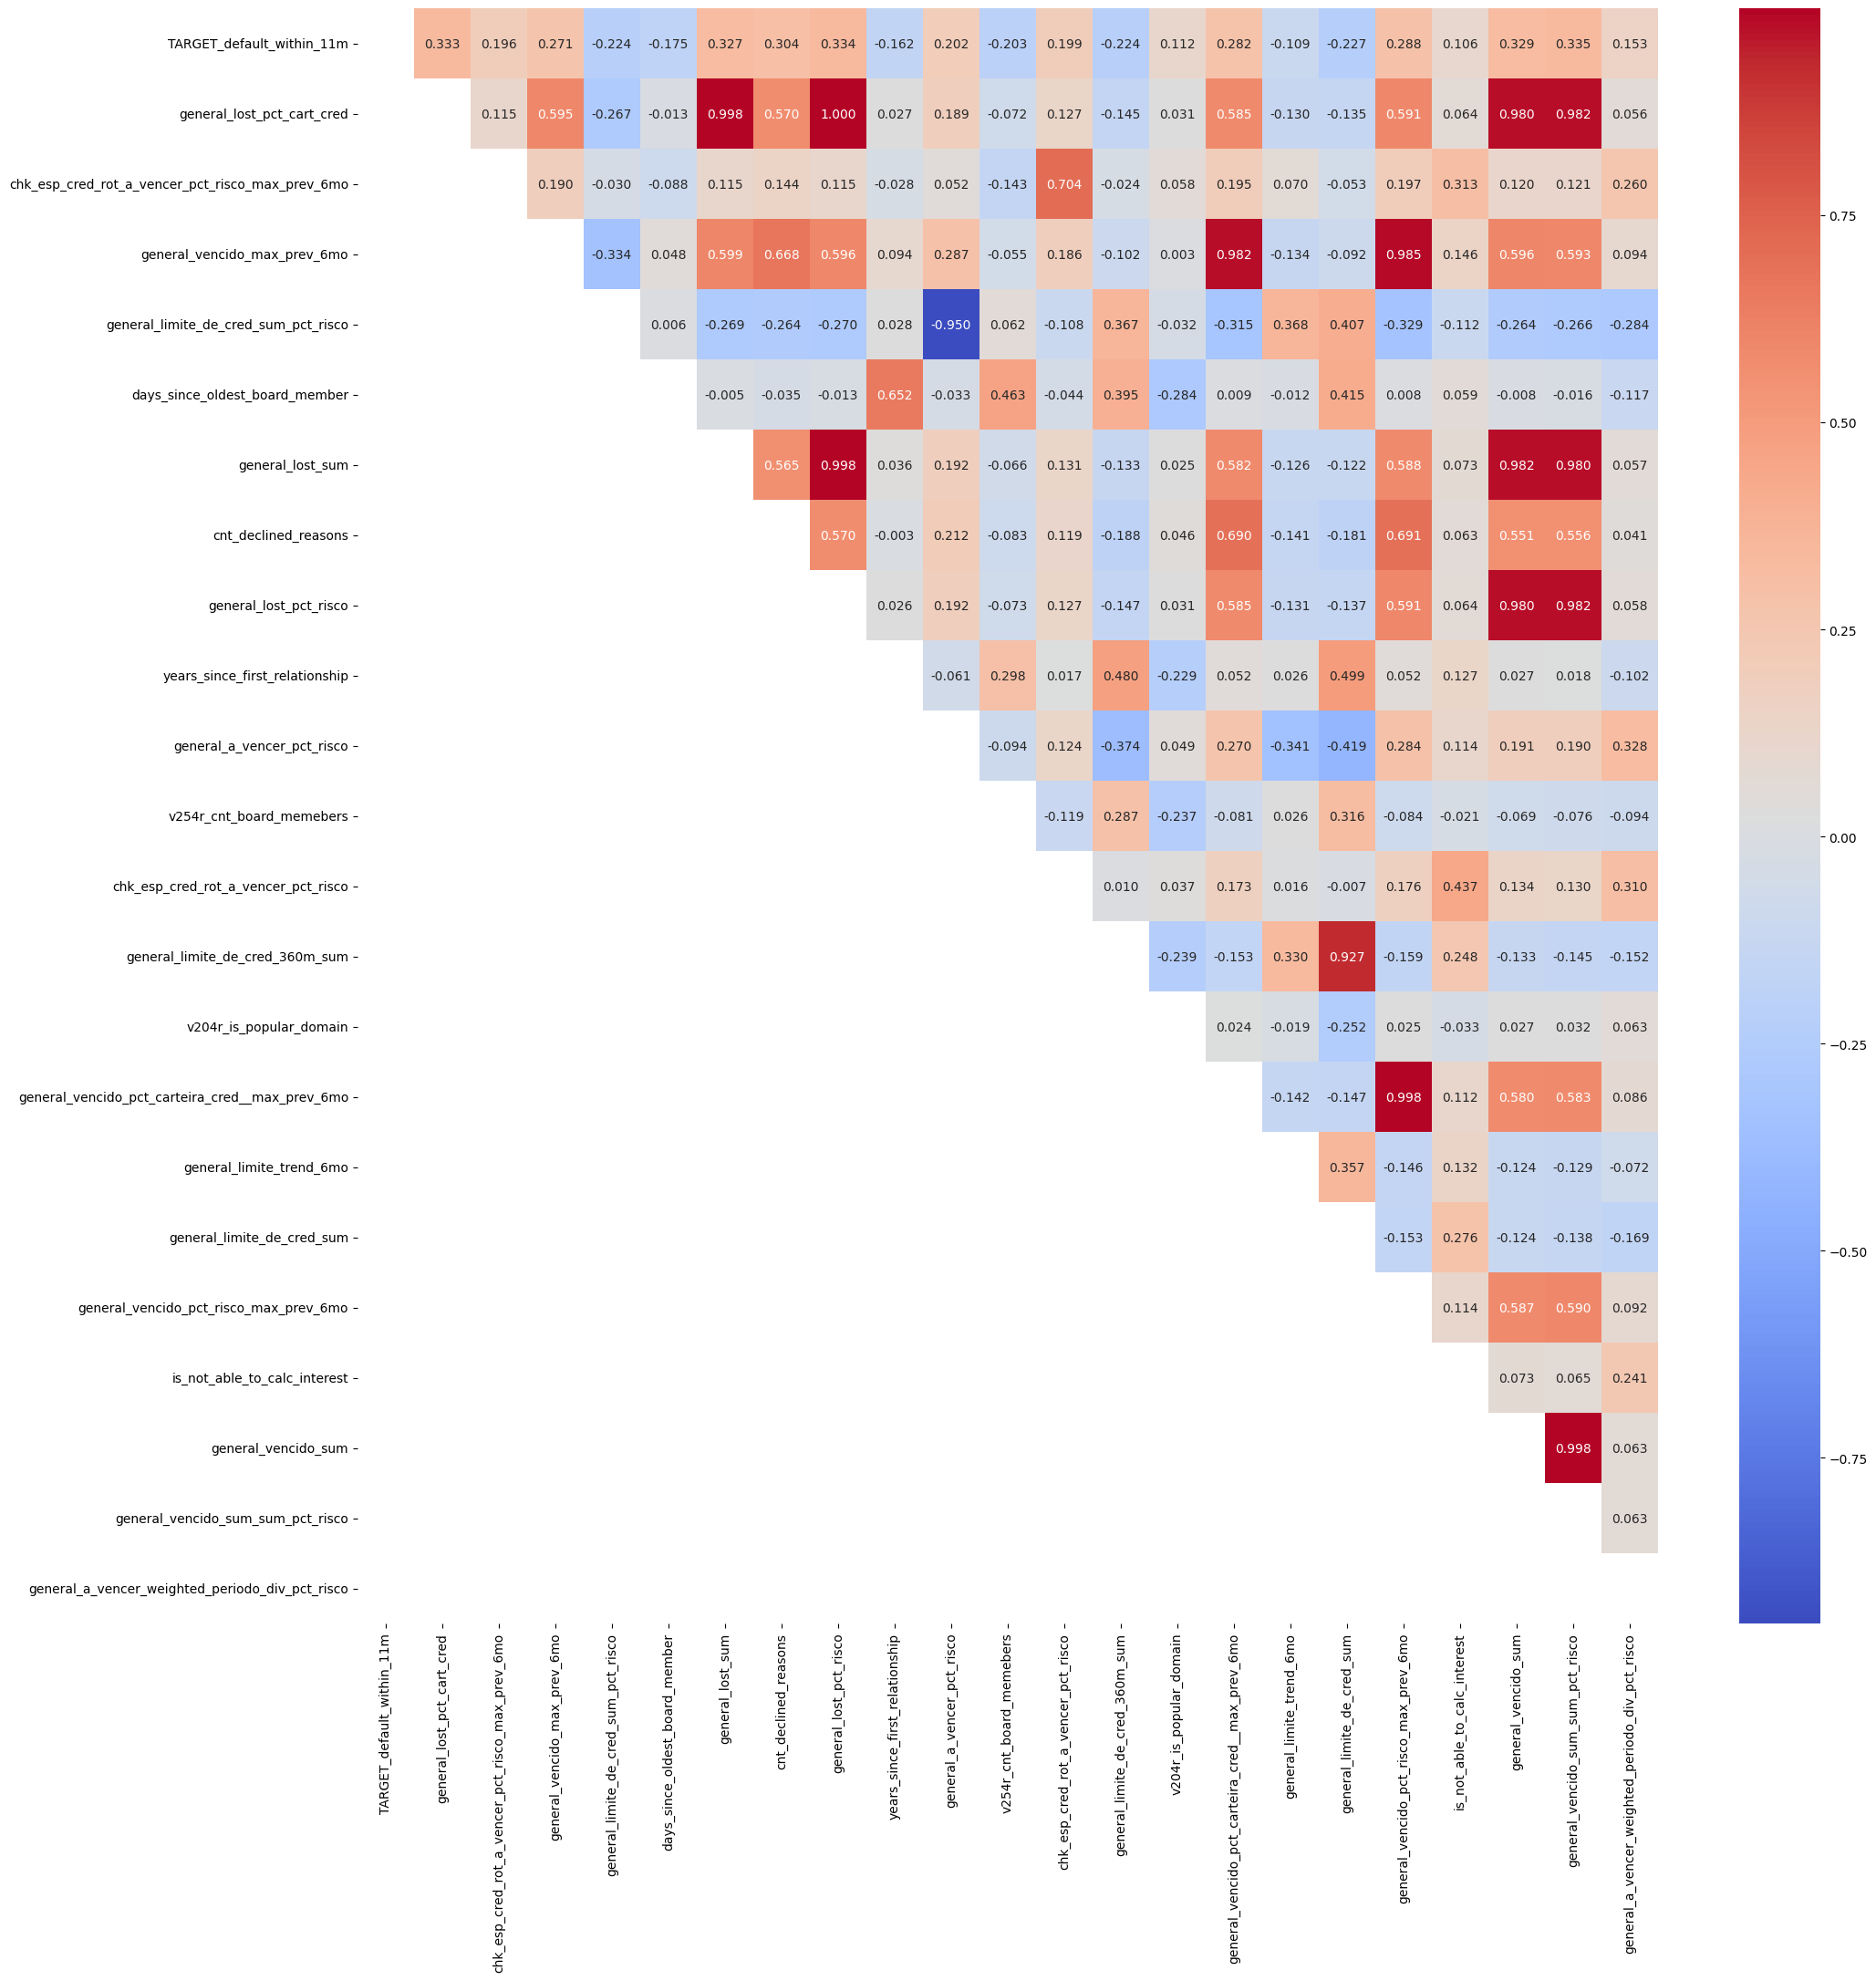

In [72]:
# Plotting the Pearson's correlation matrix
correlations = train[[target] + features_to_keep].corr('spearman')
plt.figure(figsize=(len(features_to_keep) + 1, len(features_to_keep) + 1))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', mask=np.tril(correlations))
plt.show()

## Feature Distribution Plots

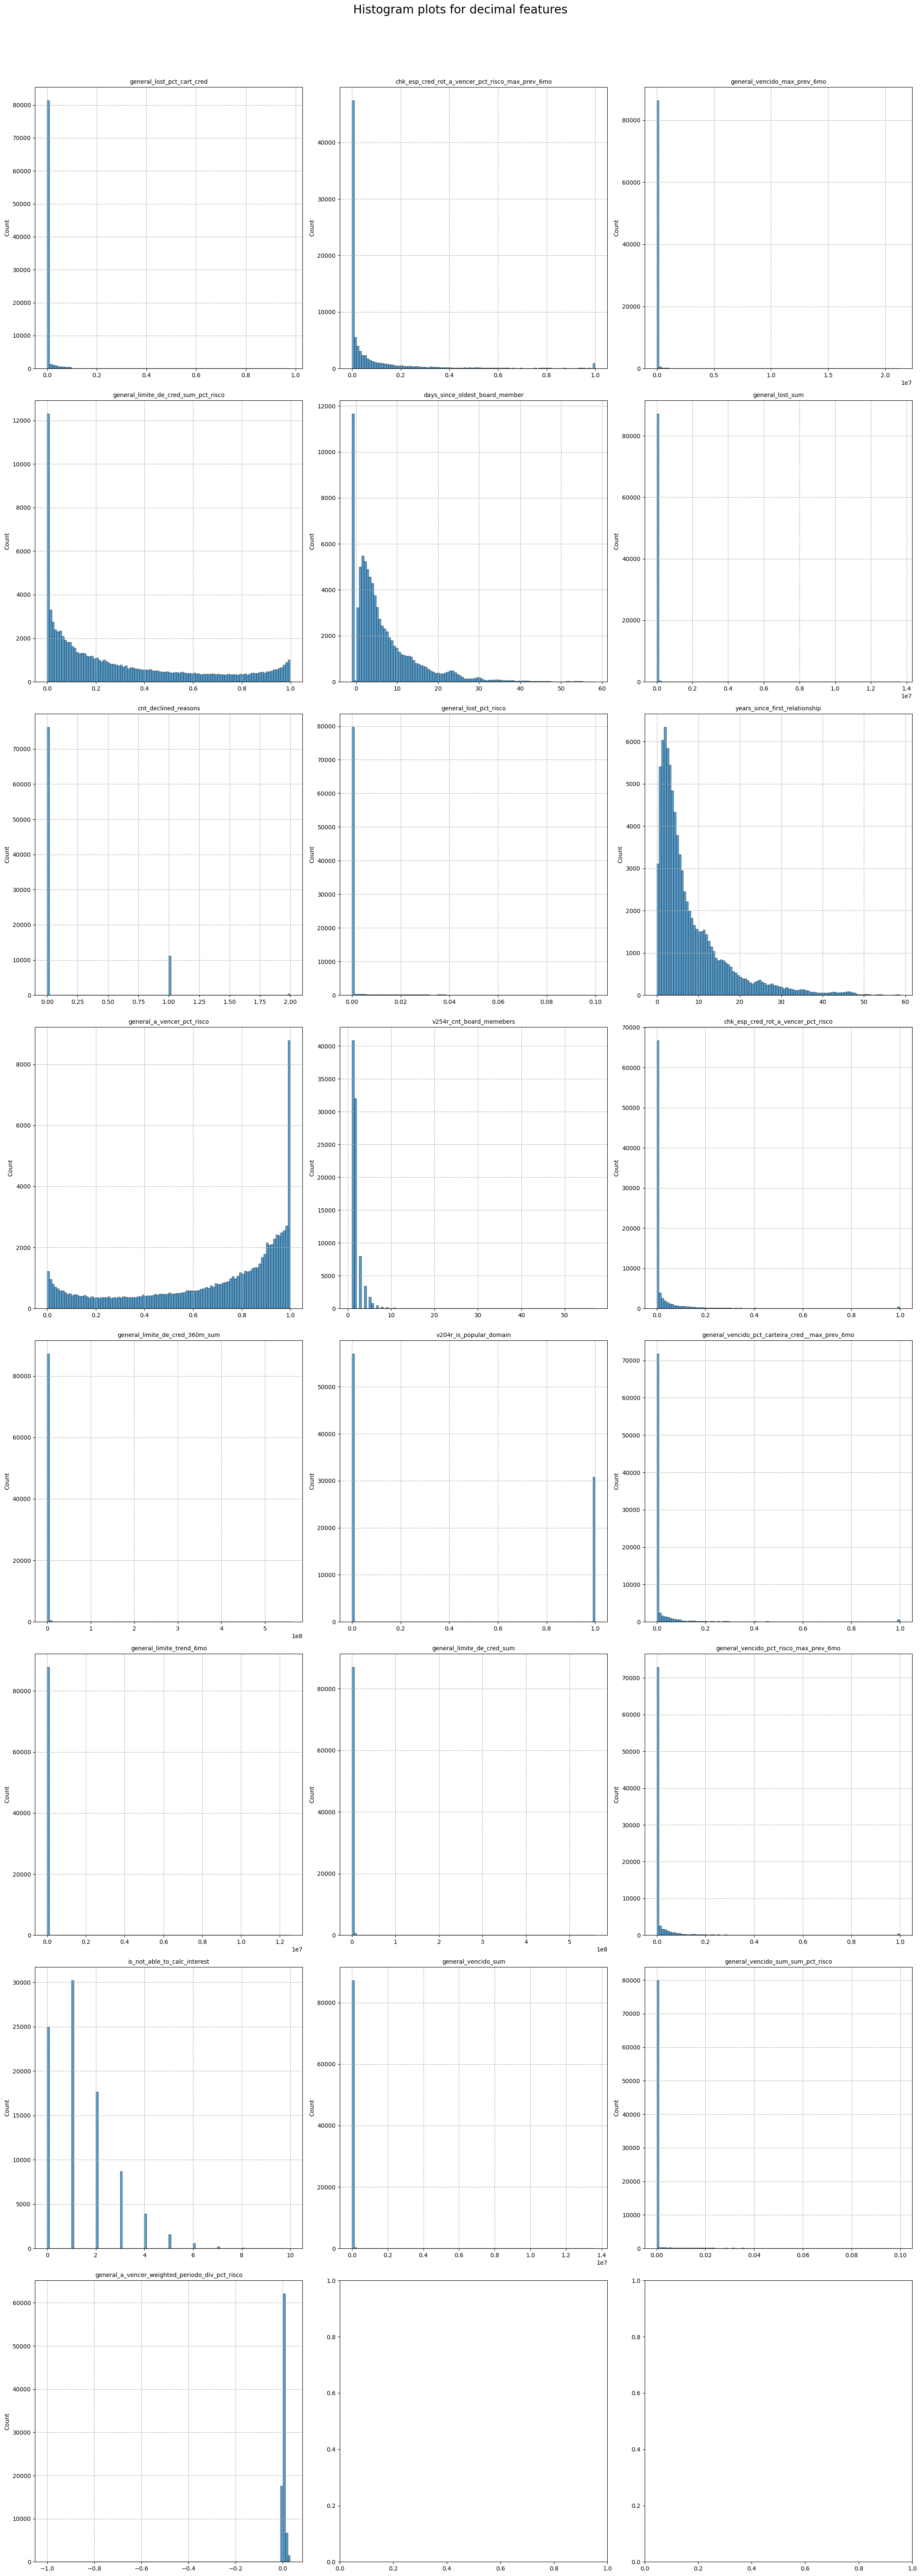

In [73]:
ncols = 3
nrows = int(np.ceil(len(features_to_keep) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(len(features_to_keep), 60), tight_layout=True)
for idx, feature in enumerate(features_to_keep):
    ax_id = ax[idx // ncols, idx % ncols]
    sns.histplot(train[feature], legend=False, ax=ax_id, bins=100)
    ax_id.set_title(feature, fontsize=10)
    ax_id.grid(linestyle='--')
    ax_id.set_xlabel('')

fig.suptitle('Histogram plots for decimal features', fontsize=20, y=1.02)
plt.show()

In [74]:
# some of the features above may have extreme values that require further investigation

In [75]:
features_to_keep

['general_lost_pct_cart_cred',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'general_vencido_max_prev_6mo',
 'general_limite_de_cred_sum_pct_risco',
 'days_since_oldest_board_member',
 'general_lost_sum',
 'cnt_declined_reasons',
 'general_lost_pct_risco',
 'years_since_first_relationship',
 'general_a_vencer_pct_risco',
 'v254r_cnt_board_memebers',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_limite_de_cred_360m_sum',
 'v204r_is_popular_domain',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_limite_trend_6mo',
 'general_limite_de_cred_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'is_not_able_to_calc_interest',
 'general_vencido_sum',
 'general_vencido_sum_sum_pct_risco',
 'general_a_vencer_weighted_periodo_div_pct_risco']

In [36]:
train['general_a_vencer_weighted_periodo_div_pct_risco'].describe()

count    87748.000000
mean         0.005460
std          0.020999
min         -1.000000
25%          0.002687
50%          0.004336
75%          0.007355
max          0.033333
Name: general_a_vencer_weighted_periodo_div_pct_risco, dtype: float64

In [40]:
train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0][keys + ['general_a_vencer_weighted_periodo_div_pct_risco', target]]

,fake_cnpj,date_reference,general_a_vencer_weighted_periodo_div_pct_risco,TARGET_default_within_11m
20483,8144,2021-04-01,-1.0,0
20486,8144,2020-10-01,-1.0,0
20487,8144,2021-07-01,-1.0,0
20490,8144,2021-01-01,-1.0,0
20491,8144,2020-09-01,-1.0,0
20492,8144,2020-11-01,-1.0,0
20494,8144,2021-05-01,-1.0,0
20495,8144,2020-12-01,-1.0,0
20496,8144,2021-02-01,-1.0,0
20498,8144,2021-03-01,-1.0,0


In [42]:
ids_to_check = train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0]['fake_cnpj'].unique()

In [45]:
train[train['fake_cnpj'].isin(ids_to_check)]['fake_cnpj'].shape, train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0]['fake_cnpj'].shape

((60,), (36,))

In [47]:
train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0][target].value_counts(1)
# I will remove these cases from the dataset, as it should not impact the model's performance
# Understanding what this -1.0 value means would be important, but we will continue with the model building process.

TARGET_default_within_11m
0    0.75
1    0.25
Name: proportion, dtype: float64

In [48]:
train = train[train['general_a_vencer_weighted_periodo_div_pct_risco'] >= 0]

In [78]:
train['general_vencido_sum_sum_pct_risco'].describe()

count    87748.000000
mean         0.002929
std          0.012275
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.099917
Name: general_vencido_sum_sum_pct_risco, dtype: float64

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


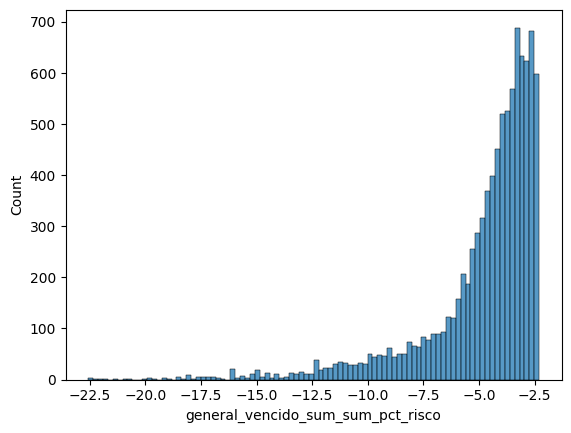

In [77]:
sns.histplot(np.log(train['general_vencido_sum_sum_pct_risco']))
plt.show()

# a log transformation for this feature may be useful

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


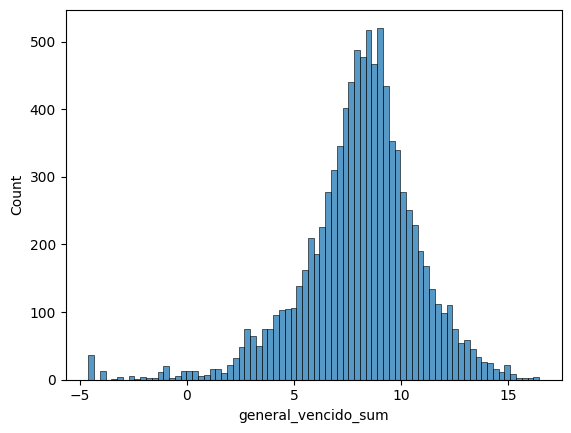

In [79]:
sns.histplot(np.log(train['general_vencido_sum']))
plt.show()

# a log transformation for this feature may be useful

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


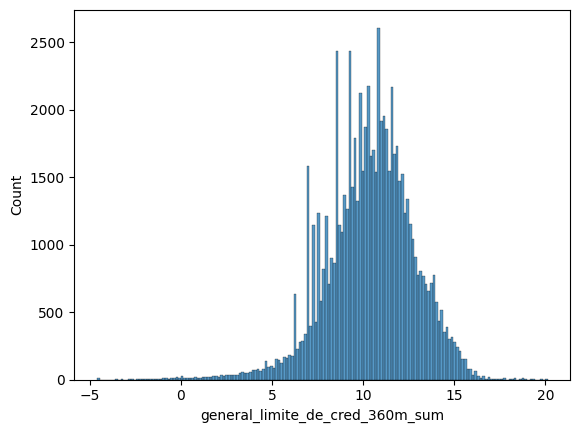

In [80]:
sns.histplot(np.log(train['general_limite_de_cred_360m_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


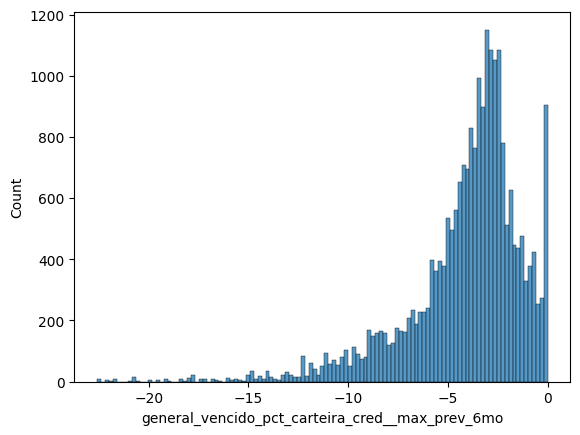

In [81]:
sns.histplot(np.log(train['general_vencido_pct_carteira_cred__max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


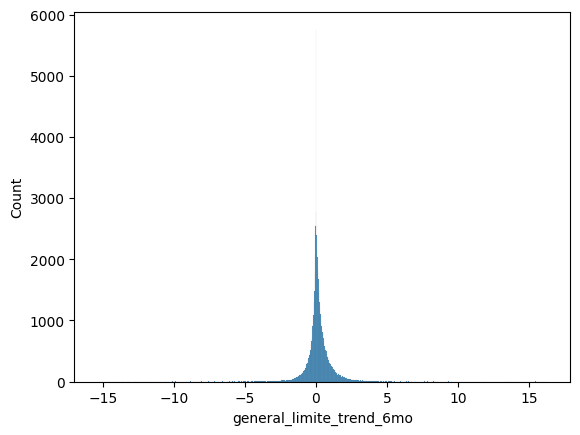

In [82]:
sns.histplot(np.log(train['general_limite_trend_6mo']))
plt.show()
# heavy tailed distribution

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


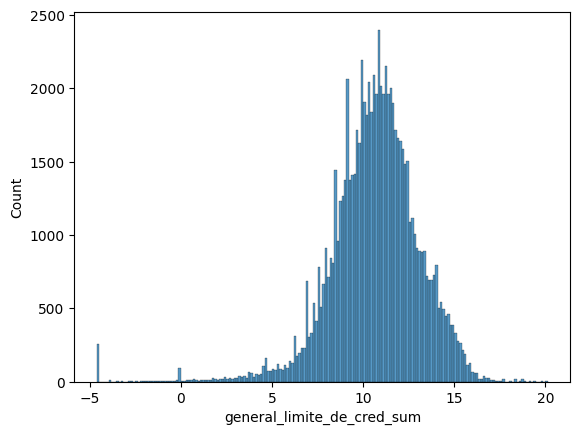

In [83]:
sns.histplot(np.log(train['general_limite_de_cred_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


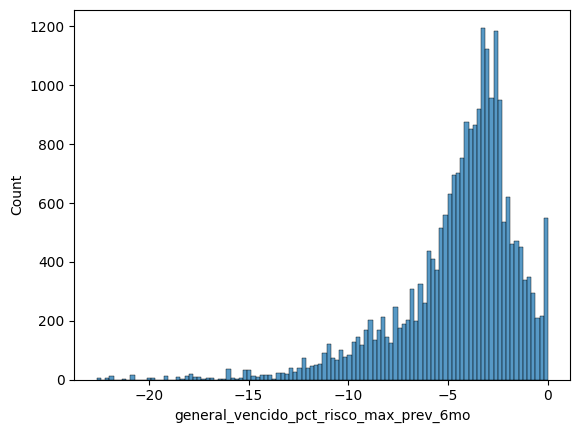

In [84]:
sns.histplot(np.log(train['general_vencido_pct_risco_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


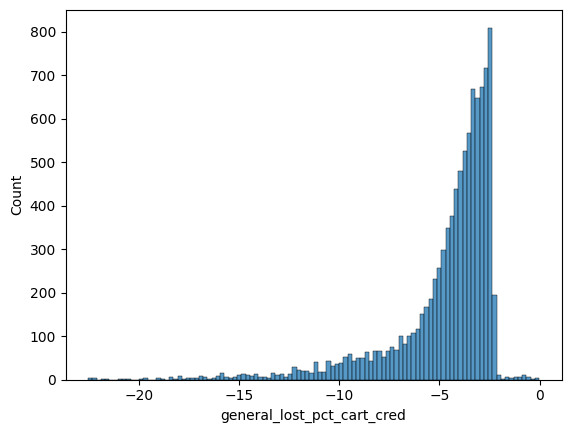

In [85]:
sns.histplot(np.log(train['general_lost_pct_cart_cred']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


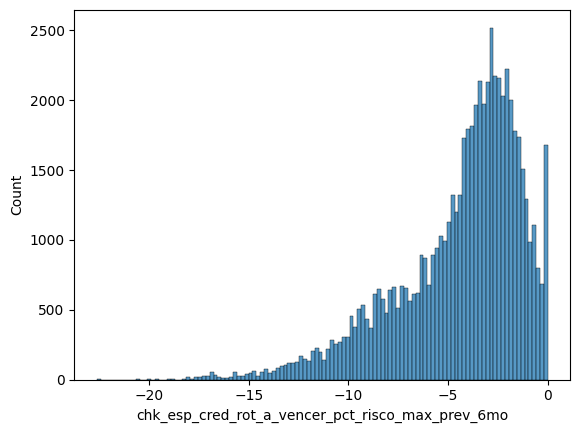

In [86]:
sns.histplot(np.log(train['chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


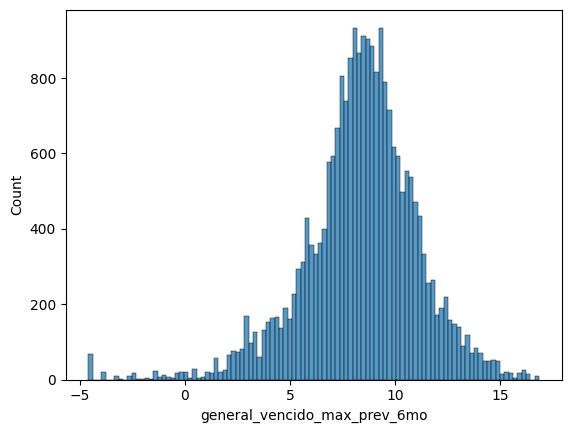

In [87]:
sns.histplot(np.log(train['general_vencido_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


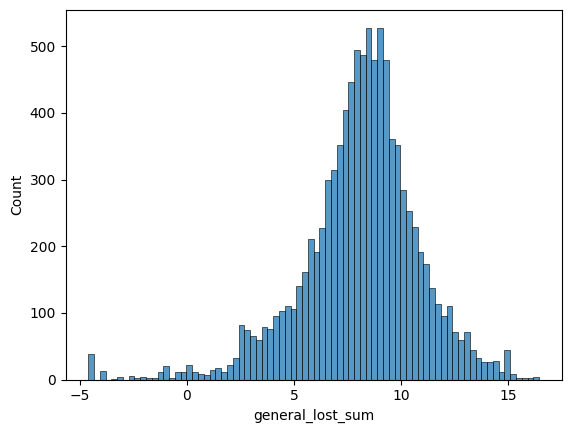

In [88]:
sns.histplot(np.log(train['general_lost_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


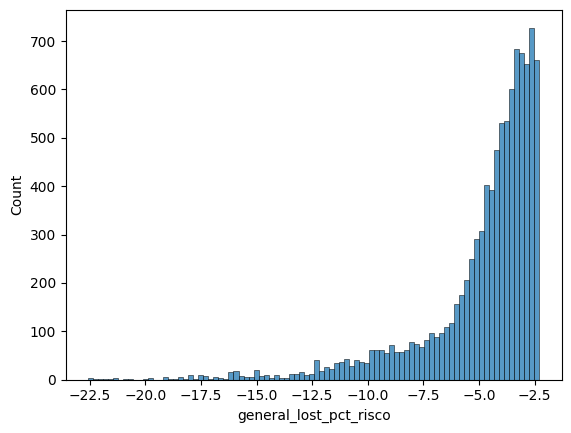

In [89]:
sns.histplot(np.log(train['general_lost_pct_risco']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


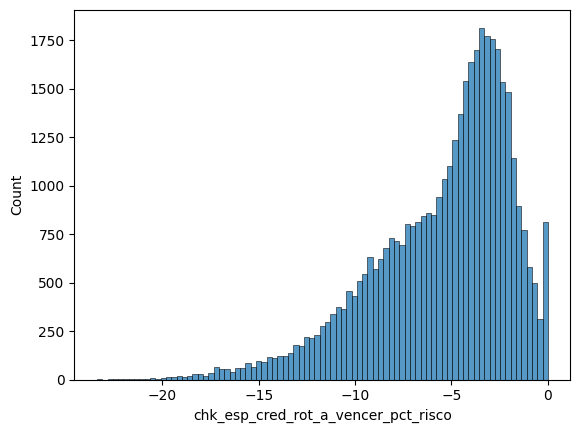

In [90]:
sns.histplot(np.log(train['chk_esp_cred_rot_a_vencer_pct_risco']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


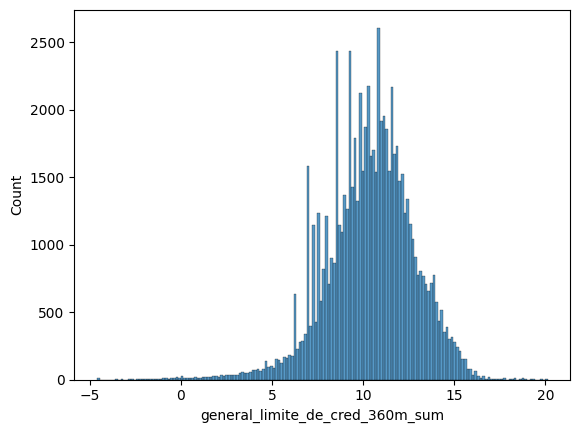

In [91]:
sns.histplot(np.log(train['general_limite_de_cred_360m_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


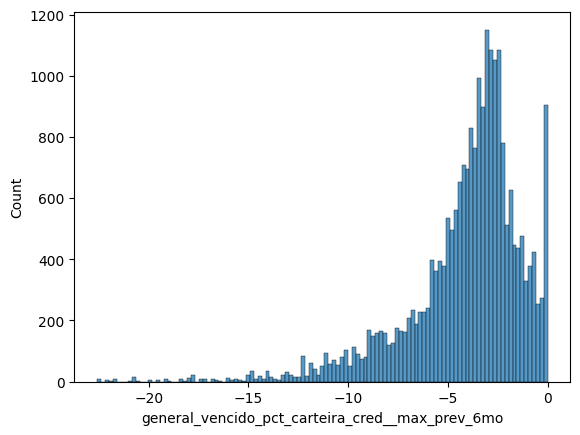

In [92]:
sns.histplot(np.log(train['general_vencido_pct_carteira_cred__max_prev_6mo']))
plt.show()

In [49]:
# calculating feature moments
skewness = train[features_to_keep].skew()
kurtosis = train[features_to_keep].kurt()

In [50]:
# skewness: negative values indicate left skewness, positive values indicate right skewness, and could be interpreted as follows:
# 0: symmetric distribution
# 0 to -1: moderately left skewed
# 0 to 1: moderately right skewed
# <-1: highly left skewed
# >1: highly right skewed

skewness.sort_values(ascending=False)

general_limite_trend_6mo                            128.409592
general_limite_de_cred_sum                           68.632558
v254r_cnt_board_memebers                             13.059745
general_vencido_pct_risco_max_prev_6mo                6.925582
chk_esp_cred_rot_a_vencer_pct_risco                   5.849401
general_vencido_sum_sum_pct_risco                     5.032104
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo      3.393804
cnt_declined_reasons                                  2.429708
general_a_vencer_weighted_periodo_div_pct_risco       2.163574
years_since_first_relationship                        2.021220
days_since_oldest_board_member                        1.899282
is_not_able_to_calc_interest                          1.228354
general_limite_de_cred_sum_pct_risco                  0.940700
v204r_is_popular_domain                               0.625842
dtype: float64

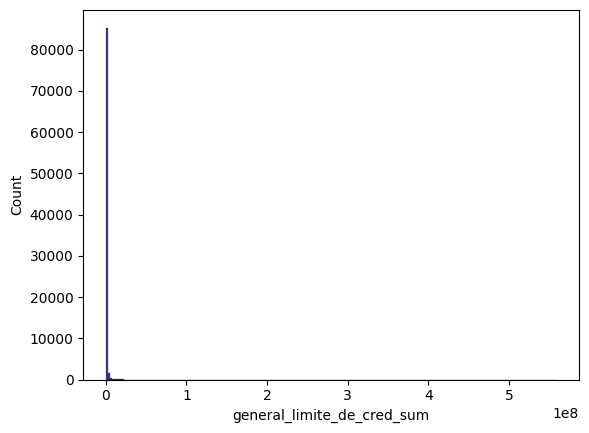

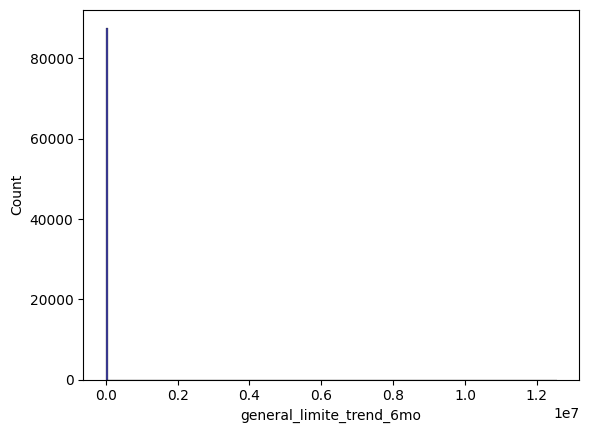

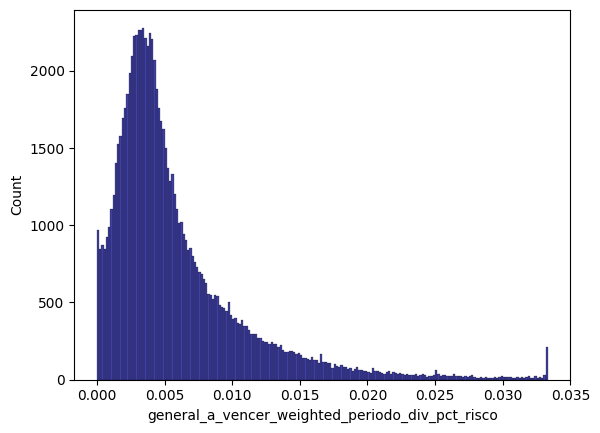

In [51]:
sns.histplot(train['general_limite_de_cred_sum'], bins=200, label='Moderately right skewed feature', color='navy')
plt.show()

sns.histplot(train['general_limite_trend_6mo'], bins=200, label='Highly right skewed feature', color='navy')
plt.show()

In [52]:
# kurtosis
# kurtosis > 0: May indicate outliers which are present away from the expected value of the distribution,
# and may be a sign of a heavy-tailed distribution.
kurtosis.sort_values(ascending=False)

general_limite_trend_6mo                            18987.621657
general_limite_de_cred_sum                           6804.069597
v254r_cnt_board_memebers                              390.336347
general_vencido_pct_risco_max_prev_6mo                 54.344772
chk_esp_cred_rot_a_vencer_pct_risco                    39.028462
general_vencido_sum_sum_pct_risco                      26.690906
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo       12.291943
general_a_vencer_weighted_periodo_div_pct_risco         6.141601
cnt_declined_reasons                                    4.935208
days_since_oldest_board_member                          4.737030
years_since_first_relationship                          4.711969
is_not_able_to_calc_interest                            1.939256
general_limite_de_cred_sum_pct_risco                   -0.403990
v204r_is_popular_domain                                -1.608358
dtype: float64

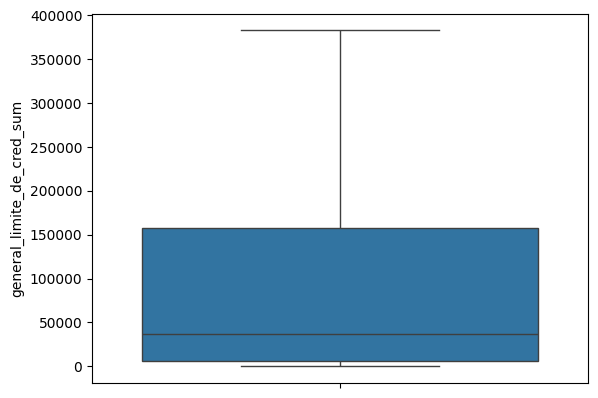

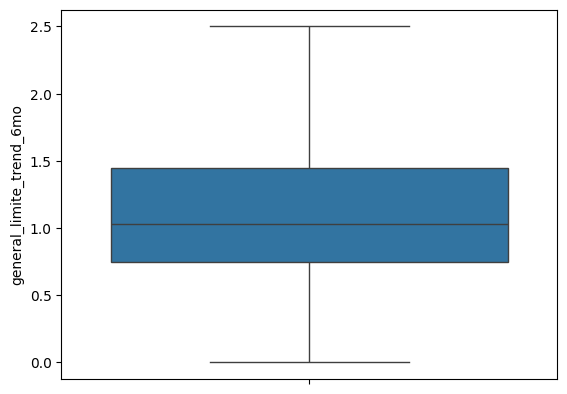

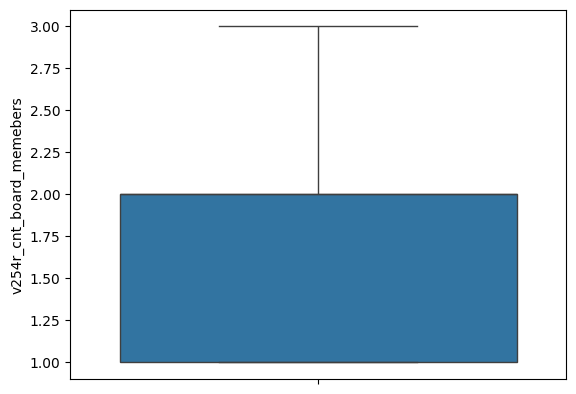

In [54]:
sns.boxplot(train['general_limite_de_cred_sum'], showfliers=False)
plt.show()

sns.boxplot(train['general_limite_trend_6mo'], showfliers=False)
plt.show()

sns.boxplot(train['v254r_cnt_board_memebers'], showfliers=False)
plt.show()

#### general_limite_de_cred_sum

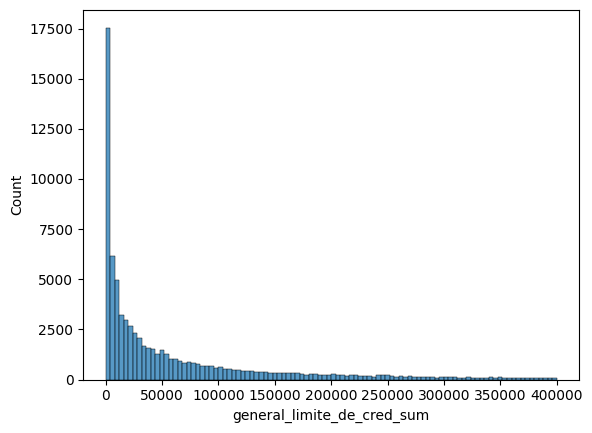

In [70]:
sns.histplot(train[train['general_limite_de_cred_sum'] <= 400000]['general_limite_de_cred_sum'], bins=100)
plt.show()

Percentage of values greater than 400000: 14.06%


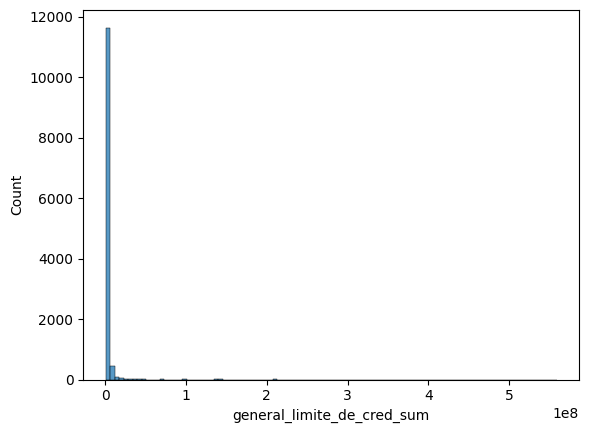

Percentage of values greater than 1000000: 7.61%


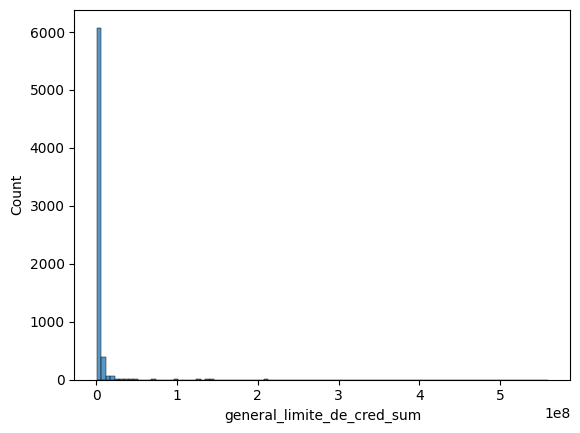

Percentage of values greater than 4000000: 1.62%


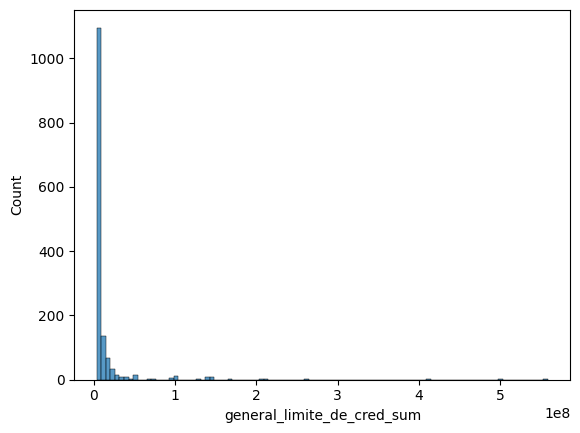

Percentage of values greater than 40000000: 0.08%


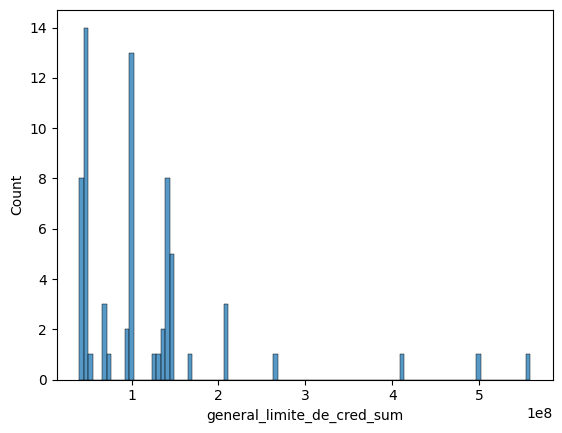

In [61]:
for value in [400000, 1000000, 4000000, 40000000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_de_cred_sum"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(train[train['general_limite_de_cred_sum'] > value]['general_limite_de_cred_sum'], bins=100)
    plt.show()

In [ ]:
# Companies with more than 4 million in credit limit are outliers, but they don't look like errors.
# A suggestion would be to have a separate credit risk pipeline for those companies, as they may
# be important for the revenue if we can deliver a good product for them.

#### general_limite_trend_6mo

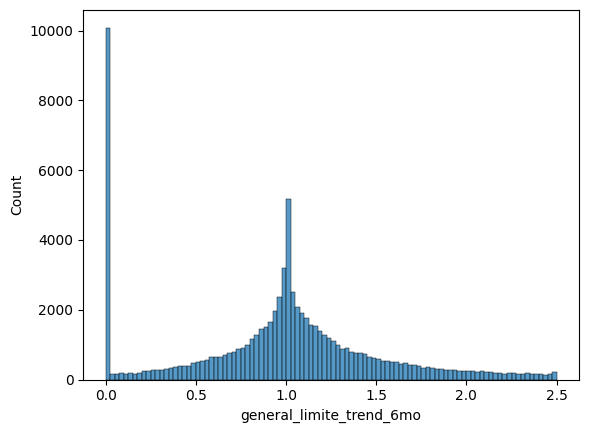

In [68]:
sns.histplot(train[train['general_limite_trend_6mo'] <= 2.5]['general_limite_trend_6mo'], bins=100)
plt.show()
# Similar to a Tweedie distribution

Percentage of values greater than 2.5: 10.32%


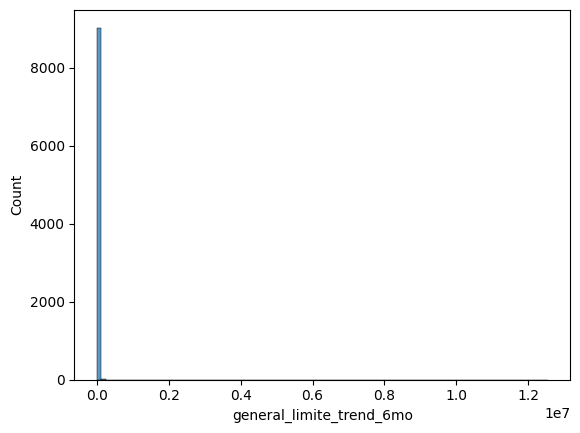

Percentage of values greater than 10: 1.83%


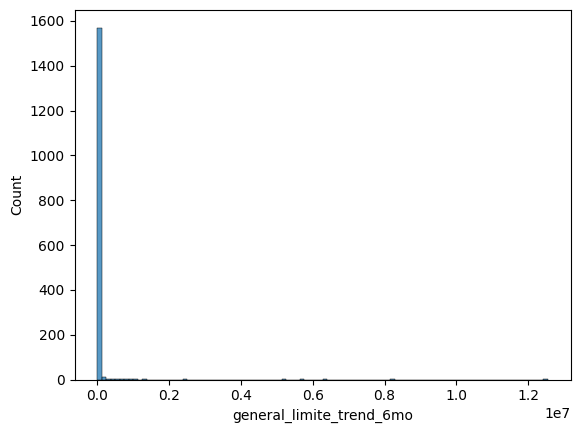

Percentage of values greater than 1000: 0.09%


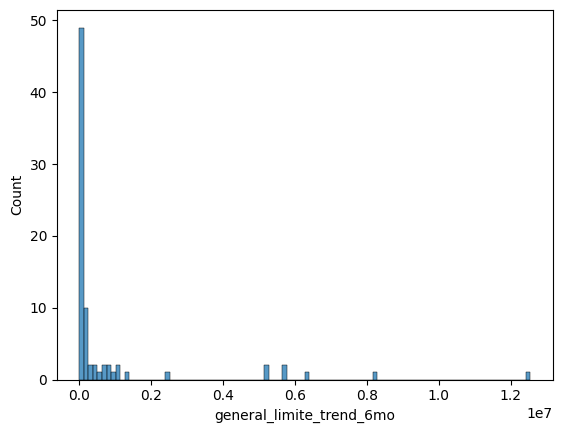

Percentage of values greater than 10000: 0.05%


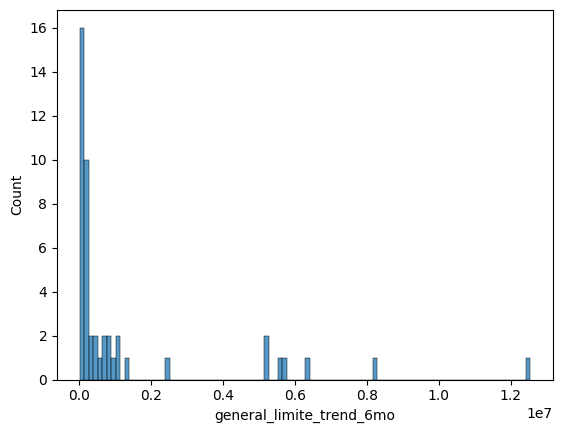

In [65]:
for value in [2.5, 10, 1000, 10000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_trend_6mo"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(train[train['general_limite_trend_6mo'] > value]['general_limite_trend_6mo'], bins=100)
    plt.show()

Percentage of values greater than 2.5: 10.32%


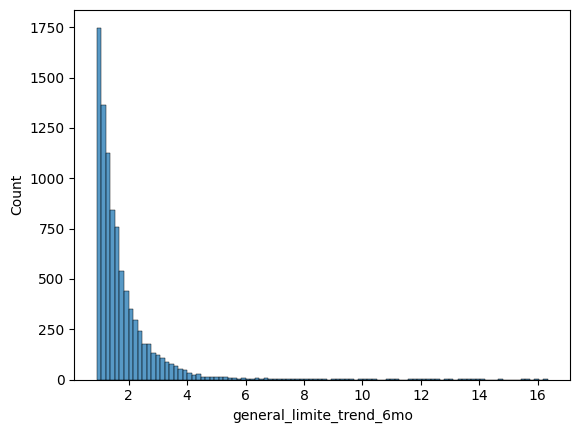

Percentage of values greater than 10: 1.83%


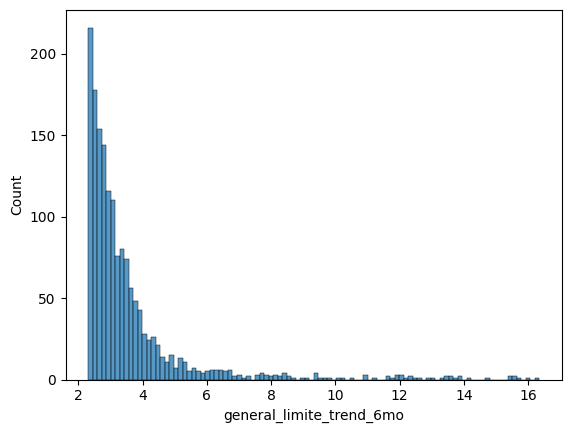

Percentage of values greater than 1000: 0.09%


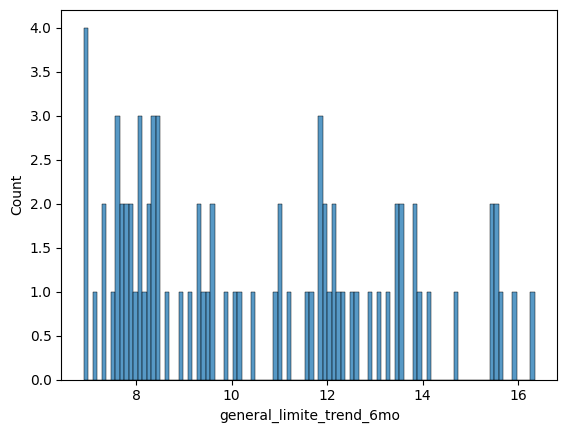

Percentage of values greater than 10000: 0.05%


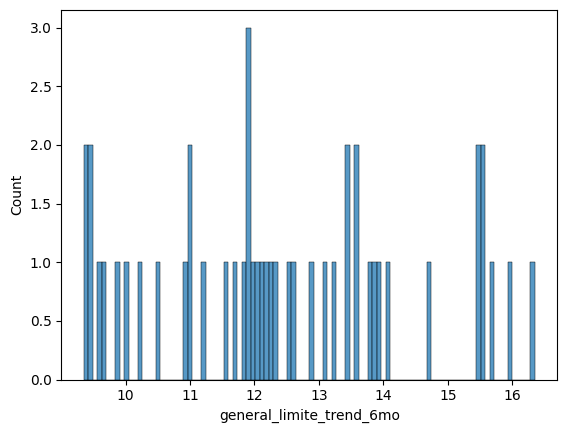

In [71]:
for value in [2.5, 10, 1000, 10000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_trend_6mo"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(np.log(train[train['general_limite_trend_6mo'] > value]['general_limite_trend_6mo']), bins=100, label=f'log({value})')
    plt.show()

In [ ]:
# A capper to this feature may be useful, as the right tail contains a few cases with high feature values.
# The log transformation may also be useful, as it may help to reduce the right skewness of the feature.

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


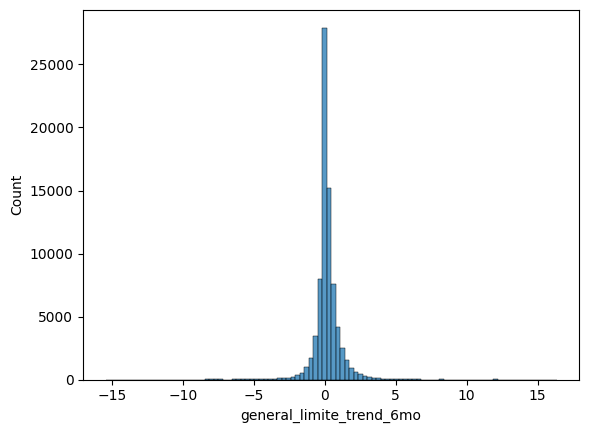

In [74]:
sns.histplot(np.log(train['general_limite_trend_6mo']), bins=100, label=f'log({value})')
plt.show()

#### v254r_cnt_board_memebers

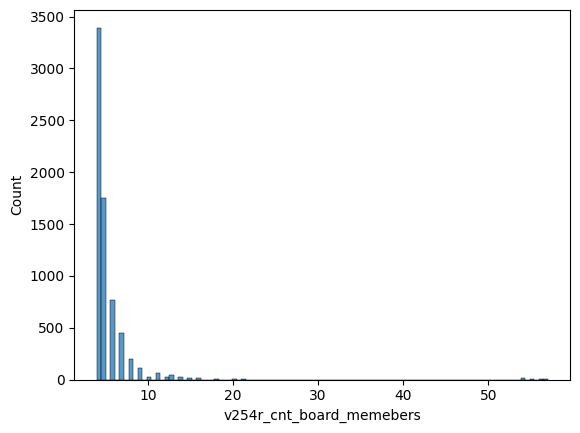

In [81]:
sns.histplot(train[train['v254r_cnt_board_memebers'] > 3]['v254r_cnt_board_memebers'], bins=100)
plt.show()

In [82]:
train['v254r_cnt_board_memebers'].value_counts(1)

v254r_cnt_board_memebers
1     0.465489
2     0.364682
3     0.090968
4     0.038695
5     0.019952
6     0.008710
7     0.005119
8     0.002246
9     0.001277
11    0.000741
13    0.000456
10    0.000319
14    0.000308
12    0.000239
15    0.000148
16    0.000137
54    0.000125
21    0.000103
20    0.000103
56    0.000091
55    0.000046
18    0.000034
57    0.000011
Name: proportion, dtype: float64

In [84]:
# general_limite_trend_6mo
# is_not_able_to_calc_interest

features_to_keep


['general_vencido_sum_sum_pct_risco',
 'v204r_is_popular_domain',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'cnt_declined_reasons',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_limite_de_cred_sum_pct_risco',
 'is_not_able_to_calc_interest',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_limite_trend_6mo',
 'days_since_oldest_board_member',
 'years_since_first_relationship',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'general_limite_de_cred_sum',
 'v254r_cnt_board_memebers']

In [91]:
train[keys + ['general_limite_trend_6mo']].head(50).sort_values(['fake_cnpj', 'date_reference'])

,fake_cnpj,date_reference,general_limite_trend_6mo
5,76,2021-03-01,1.000000
2,76,2021-04-01,0.994837
4,76,2021-05-01,0.980906
1,76,2021-06-01,1.046525
0,76,2021-07-01,1.112144
3,76,2021-08-01,1.159693
6,76,2021-09-01,1.307057
7,254,2020-10-01,0.750458
9,254,2020-11-01,0.721039
8,254,2020-12-01,0.701373


In [ ]:
train['is_not_able_to_calc_interest'].value_counts()

is_not_able_to_calc_interest
1     30184
0     24947
2     17618
3      8664
4      3884
5      1595
6       567
7       187
8        78
9        22
10        2
Name: count, dtype: int64